In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [5]:
input_image_path = "C:/Users/HP/Downloads/LC08_L2SP_216014_20230807_20230812_02_T1_SR_B4.tif"

In [4]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [6]:
# Define paths to the Red and SWIR1 band image files
red_band_path = "C:/Users/HP/Downloads/LC09_L2SP_001073_20230712_20230714_02_T1_SR_B4.tif"
swir1_band_path = "C:/Users/HP/Downloads/LC09_L2SP_001073_20230712_20230714_02_T1_SR_B6.tif"

In [8]:
# Open the Red band image
with rasterio.open(red_band_path) as red_src:
    red_band = red_src.read(1).astype(float)  # Read the band
    red_band /= 10000  # Normalize by the common scale factor for Landsat SR data
    red_band[red_band == red_src.nodata] = np.nan  # Mask no-data values

# Open the SWIR1 band image
with rasterio.open(swir1_band_path) as swir1_src:
    
    swir1_band = swir1_src.read(1).astype(float)  # Read the band
    swir1_band /= 10000  # Normalize by the common scale factor for Landsat SR data
    swir1_band[swir1_band == swir1_src.nodata] = np.nan  # Mask no-data values

In [61]:
# Calculate a difference index to highlight sand (Red - SWIR1)
sand_index = (red_band - swir1_band) /(red_band + swir1_band)

# Define a threshold for detecting sand
sand_threshold = 0.1  # Adjust this based on your area's characteristics

# Create a binary mask where sand areas are True
sand_mask = sand_index < sand_threshold

# Plotting the sand detection
plt.figure(figsize=(10, 10))
plt.imshow(sand_mask, cmap='Oranges')
plt.title('Detected Sand Areas Using Red and SWIR1 Bands')
plt.colorbar(label='Sand Detection (1=True, 0=False)')
plt.show()


In [10]:
green_band_path = "C:/Users/HP/Downloads/LC09_L2SP_001073_20230712_20230714_02_T1_SR_B3.tif"

In [12]:
with rasterio.open(green_band_path) as green_src:
    
    green_band = green_src.read(1).astype(float)  # Read the band
    green_band /= 10000  # Normalize by the common scale factor for Landsat SR data
    green_band[green_band == green_src.nodata] = np.nan  # Mask no-data values

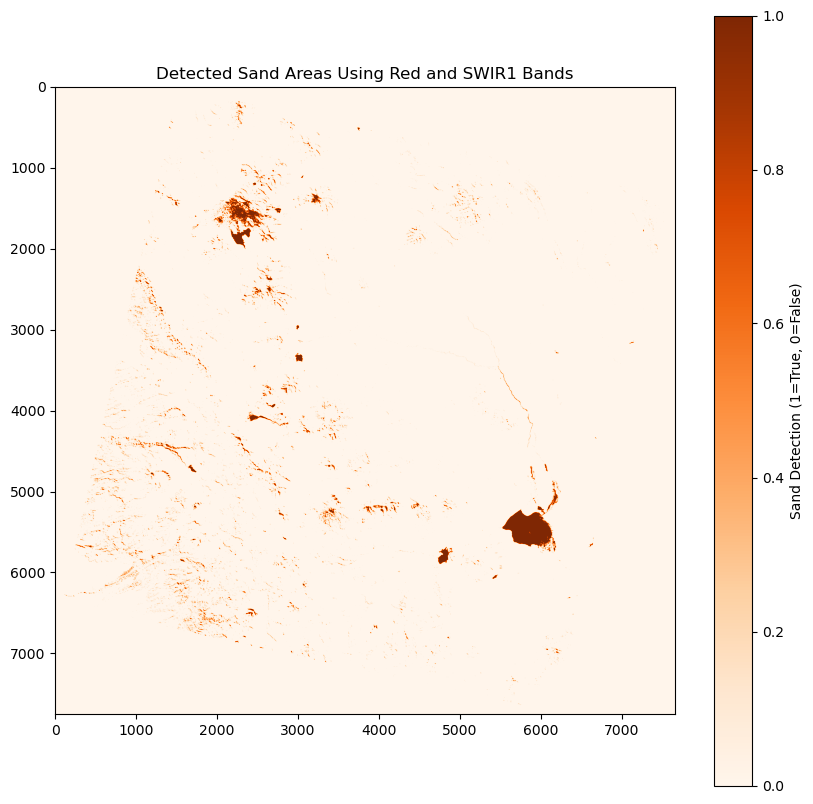

In [14]:
epsilon = np.finfo(float).eps
swir1_band_safe = np.where(swir1_band <= 0, epsilon, swir1_band)

# Calculate NSI
nsi = (green_band + red_band) / (np.log(swir1_band_safe) +0.000001)



# Define a threshold for detecting sand
sand_threshold = 1.4

# Create a binary mask where sand areas are True
sand_mask = nsi < sand_threshold

# Plotting the sand detection
plt.figure(figsize=(10, 10))
plt.imshow(sand_mask, cmap='Oranges')
plt.title('Detected Sand Areas Using Red and SWIR1 Bands')
plt.colorbar(label='Sand Detection (1=True, 0=False)')
plt.show()